<a href="https://colab.research.google.com/github/jflorescuba/Computer_Vision_Structural_Damage/blob/main/test_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Num GPUs Available:  1
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2567 - accuracy: 0.9257 - val_loss: 0.1333 - val_accuracy: 0.9603
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1142 - accuracy: 0.9666 - val_loss: 0.1001 - val_accuracy: 0.9704
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0803 - accuracy: 0.9753 - val_loss: 0.0901 - val_accuracy: 0.9709
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0598 - accuracy: 0.9816 - val_loss: 0.0909 - val_accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0470 - accuracy: 0.9844 - val_loss: 0.0717 - val_accuracy: 0.9787
313/313 - 1s - loss: 0.0717 - accuracy: 0.9787 - 520ms/epoch - 2ms/step

Test accuracy: 0.9786999821662903


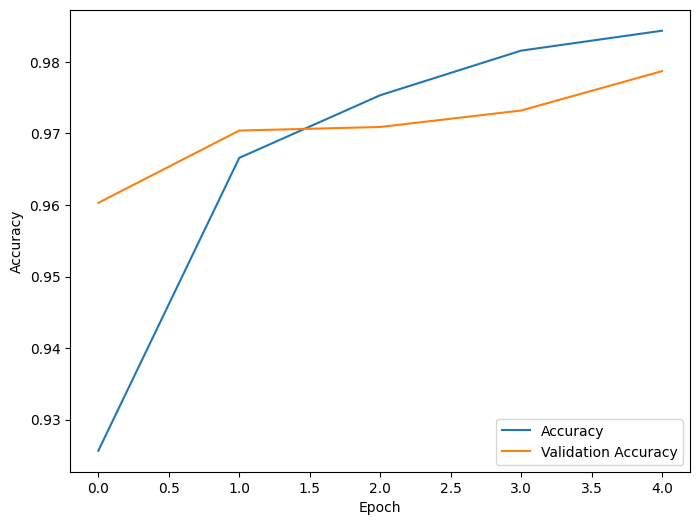

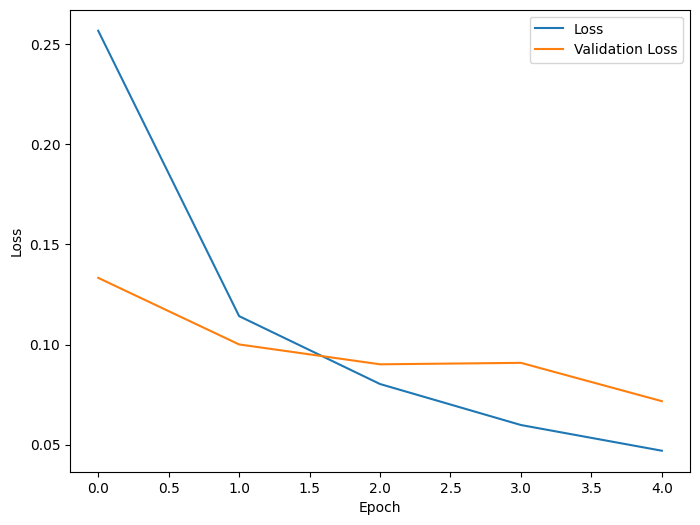

Computation time:  43.3748664855957 segundos


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import time

#Registar
start_time = time.time()

# Verificar si la GPU está disponible
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Cargar y preparar el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalizar los píxeles de las imágenes al rango [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Construir el modelo
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Aplanar las imágenes de 28x28 a un vector de 784
    layers.Dense(128, activation='relu'),
    layers.Dense(10)  # 10 clases para los dígitos 0-9
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Graficar precisión y pérdida durante el entrenamiento
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

end_time = time.time()

elapsed_time = end_time - start_time
print("\n Computation time: ", elapsed_time, "segundos")